In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pingouin as pg

import requests
from urllib.parse import urlencode

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.iolib.table import SimpleTable

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

url_dict = {
        'task_one': {'file_name': '5_task_1.csv', 'public_key': 'https://disk.yandex.ru/d/iRcyB5PS8JB1lw'},
        'task_two': {'file_name': '5_task_2.csv', 'public_key': 'https://disk.yandex.ru/d/NqeZSGmq5O3iFw'}
        }

In [3]:
def download_files(url_dictionary, dataset):
    # ссылка для загрузки
    final_url = base_url + urlencode(dict(public_key=url_dictionary[dataset]['public_key']))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    # сохранение файла в датафрейм
    df = pd.read_csv(download_url)
    return df

In [4]:
to_df = download_files(url_dict, 'task_one')
tt_df = download_files(url_dict, 'task_two')

In [5]:
######################################################################################################
######################################################################################################

In [6]:
# сравнивание средних значений anova
pg.anova(data=to_df, dv="events", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


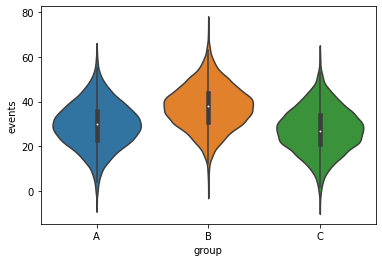

In [7]:
sns.violinplot(x="group", y="events", data=to_df)

In [8]:
######################################################################################################
######################################################################################################

In [9]:
# проверка на гамогеность с помощью метода левена
pg.homoscedasticity(data=to_df, dv='events', group='group', method='levene')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [10]:
######################################################################################################
######################################################################################################

In [11]:
# проверяем на нормальность
pg.normality(to_df, dv='events', group='group', method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [12]:
Ag = to_df.query("group == 'A'").events
Bg = to_df.query("group == 'B'").events
Cg = to_df.query("group == 'C'").events

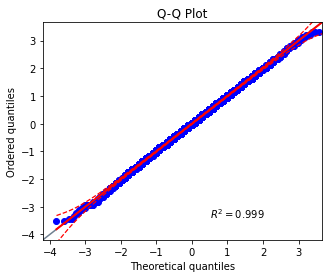

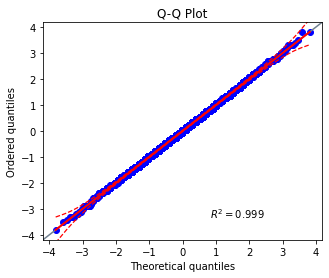

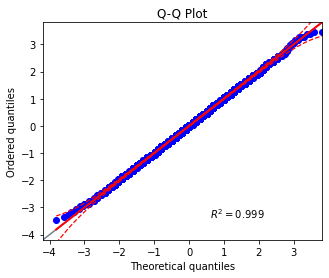

In [13]:
pg.qqplot(Ag, dist='norm')
pg.qqplot(Bg, dist='norm')
pg.qqplot(Cg, dist='norm')

In [14]:
######################################################################################################
######################################################################################################

In [15]:
# сравнивание средних значений anova
pg.anova(data=to_df, dv="events", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [16]:
######################################################################################################
######################################################################################################

In [17]:
# тьюки
pg.pairwise_tukey(data=to_df, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [18]:
# нашел только у статы и reject у него, есть ли статистически значимые различия
pairwise_tukeyhsd(to_df.events, to_df.group).summary() # / meandiff справа на лево B - A

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [19]:
######################################################################################################
######################################################################################################

In [94]:
#обычное сравнение по кол-ву
tt_df_hist_t = tt_df.query("group == 'test'")[['events']]

In [53]:
tt_df_hist_c = tt_df.query("group == 'control'")[['events']]

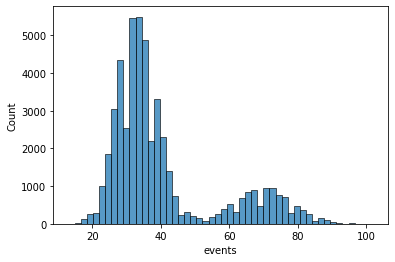

In [57]:
sns.histplot(data=tt_df_hist_t, x='events', bins=50)

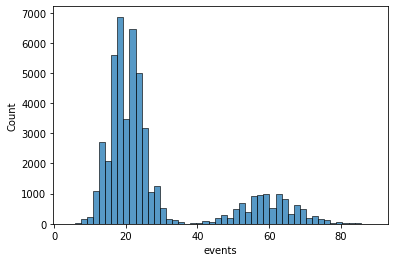

In [59]:
sns.histplot(data=tt_df_hist_c, x='events', bins=50)

In [60]:
######################################################################################################
######################################################################################################

In [74]:
#выводим все полезные статистические значения
tt_df.query("group == 'test' and segment == 'high'").describe()

,id,events
count,10000.000000,10000.000000
mean,50126.620600,69.938500
std,28821.133487,8.403974
min,14.000000,40.000000
25%,25317.500000,64.000000
50%,50234.500000,70.000000
75%,74783.250000,76.000000
max,99996.000000,102.000000


In [75]:
tt_df.query("group == 'test' and segment == 'low'").describe()

,id,events
count,40000.000000,40000.000000
mean,49913.343600,33.025925
std,28917.383492,5.720845
min,1.000000,13.000000
25%,24763.750000,29.000000
50%,49706.500000,33.000000
75%,75127.250000,37.000000
max,99995.000000,59.000000


In [79]:
round(tt_df.query("group == 'control' and segment == 'high'").describe(), 2)

,id,events
count,10000.00,10000.00
mean,50473.98,59.97
std,28761.44,7.81
min,10.00,31.00
25%,25612.50,55.00
50%,51031.00,60.00
75%,75261.25,65.00
max,99976.00,89.00


In [77]:
tt_df.query("group == 'control' and segment == 'low'").describe()

,id,events
count,40000.000000,40000.000000
mean,49935.256700,20.031575
std,28855.849243,4.473576
min,0.000000,4.000000
25%,25022.250000,17.000000
50%,49944.500000,20.000000
75%,74874.250000,23.000000
max,99999.000000,41.000000


In [81]:
######################################################################################################
######################################################################################################

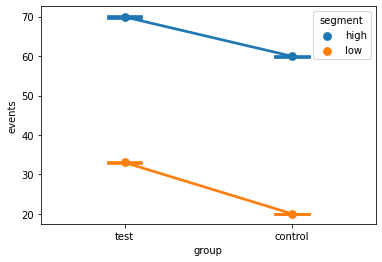

In [84]:
#сравнимаем группы
sns.pointplot(x="group", y="events", hue="segment", data=tt_df, capsize=0.2)

In [85]:
######################################################################################################
######################################################################################################

In [88]:
#проводим тест по тьюки чтобы понять между какими группами есть стат. различия
tt_df['combination'] = tt_df['group'] + ' / ' + tt_df['segment']
tt_df

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high
...,...,...,...,...,...
99995,60695,control,low,15.0,control / low
99996,5934,control,low,16.0,control / low
99997,30046,control,low,22.0,control / low
99998,26474,control,low,21.0,control / low


In [93]:
pg.anova(data=tt_df, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [89]:
#В данном случае для последующих сравнений между группами можно проделать следующую операцию:
#соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey
pg.pairwise_tukey(data=tt_df, dv="events", between="combination")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


In [104]:
opa = pairwise_tukeyhsd(tt_df.events, tt_df.combination).summary()

In [95]:
######################################################################################################
######################################################################################################

In [109]:
opa = pd.DataFrame(opa.data[1:], columns=opa.data[0])

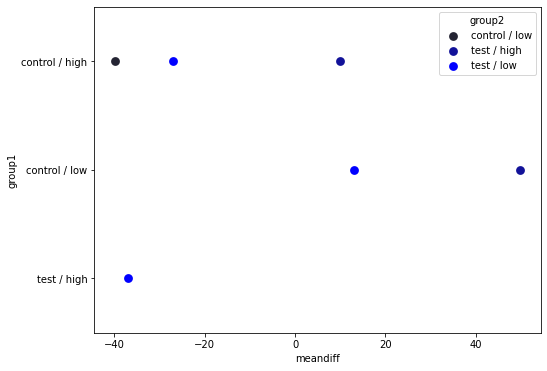

In [118]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='meandiff', y='group1',hue='group2', data=opa, join=False,
              capsize=.1, color='blue', errwidth=1, markers='o')